<a href="https://colab.research.google.com/github/wiv33/A-Learning-python/blob/master/machine-learning/_000_hello_machine/_000_basic/_010_ExamForEdu/_000_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 아이리스 손글씨 데이터 예측하기

In [163]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

- tensorflow
- layers: 

  + Flatten: arg의 shape을 (-1, 1)로 reshape

  + Activation: 활성화 함수

  + Dropout: 네트워크의 눈을 감기는 함수

  + BatchNormalization: 한 레이어마다 정규화

  + Dense: 


## iris data

In [164]:
(x_train, y_train), (x_test, y_test) = mnist.load_data('iris')

In [165]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

- 6만개 행과, (28, 28) shape를 가진 데이터
- 6만개 정답 라벨로 [0], [1], [2] ... [9]의 데이터
  + 1번 행의 정답은 5
  + 2번 행의 정답은 0
  + 3번 행의 정답은 4


## 값 정규화

In [166]:
x_train[0][7]

array([  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
       253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
         0,   0], dtype=uint8)

In [167]:
x_train, x_test = x_train / 255., x_test / 255.

In [168]:
x_train[0][7]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.19215686, 0.93333333, 0.99215686,
       0.99215686, 0.99215686, 0.99215686, 0.99215686, 0.99215686,
       0.99215686, 0.99215686, 0.98431373, 0.36470588, 0.32156863,
       0.32156863, 0.21960784, 0.15294118, 0.        , 0.        ,
       0.        , 0.        , 0.        ])

- 

- 최대값 255로 나누는 작업
- 수치가 낮아짐
- 특성은 유지됨

In [169]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

## Model 선언

In [170]:
class CustomModel(tf.keras.Model):
  def __init__(self, lr):
    super(CustomModel, self).__init__(name='CM')
    self.flatten = tf.keras.layers.Flatten()
    self.hidden = layers.Dense(kwargs.get('hidden_dimension', 256), bias_initializer='ones')
    self.bat = layers.BatchNormalization()
    self.act = layers.Activation(activation='swish')
    self.dropout = tf.keras.layers.Dropout(rate=lr)
    self.hidden2 = layers.Dense(kwargs.get('hidden2_dimension', 128))
    self.bat2 = layers.BatchNormalization()
    self.hidden3 = layers.Dense(kwargs.get('hidden3_dimension', 10), activation='softmax')
    
  def call(self, x):
    print(f'모델에 처음 들어온 shape: {x.shape}')
    x = self.flatten(x)
    print(f'flatten 이후 shape: {x.shape}')
    x = self.hidden(x)
    x = self.bat(x)
    # print(x.shape)
    x = self.act(x)
    x = self.dropout(x)
    x = self.hidden2(x)
    # print(x.shape)
    x = self.bat2(x)
    x = self.act(x)
    # print(x.shape)
    x = self.hidden3(x)
    return x    

kwargs = {
    'hidden_dimension': 256,
    'hidden2_dimension': 128,
    'hidden3_dimension': 10
}



## model 학습


In [171]:
import numpy as np
import pandas as pd

y = {}
df = pd.DataFrame(data=None, columns=['dropout', 'loss', 'accuracy'])

for i, lr in enumerate(np.arange(0, 1, .1)):
  learning_rate = round(lr, 1)
  model = CustomModel(round(learning_rate, 1))

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  
  model.fit(x_train, y_train, batch_size=256, epochs=12, verbose=0)
  score = model.evaluate(x_test, y_test)
  y[lr] = model.predict(x_test)
  print('test accruacy', score[1])
  df = df.append({'dropout': round(learning_rate, 1), 'loss': score[0], 'accuracy': score[1]}, ignore_index=True)

모델에 처음 들어온 shape: (None, 28, 28)
flatten 이후 shape: (None, 784)
모델에 처음 들어온 shape: (None, 28, 28)
flatten 이후 shape: (None, 784)
모델에 처음 들어온 shape: (None, 28, 28)
flatten 이후 shape: (None, 784)
313/313 [==============================] - 0s 1ms/step - loss: 0.0685 - accuracy: 0.9808
모델에 처음 들어온 shape: (None, 28, 28)
flatten 이후 shape: (None, 784)
test accruacy 0.9807999730110168
모델에 처음 들어온 shape: (None, 28, 28)
flatten 이후 shape: (None, 784)
모델에 처음 들어온 shape: (None, 28, 28)
flatten 이후 shape: (None, 784)
모델에 처음 들어온 shape: (None, 28, 28)
flatten 이후 shape: (None, 784)
313/313 [==============================] - 0s 1ms/step - loss: 0.0663 - accuracy: 0.9801
모델에 처음 들어온 shape: (None, 28, 28)
flatten 이후 shape: (None, 784)
test accruacy 0.9800999760627747
모델에 처음 들어온 shape: (None, 28, 28)
flatten 이후 shape: (None, 784)
모델에 처음 들어온 shape: (None, 28, 28)
flatten 이후 shape: (None, 784)
모델에 처음 들어온 shape: (None, 28, 28)
flatten 이후 shape: (None, 784)
313/313 [==============================] - 0s 1ms/step - loss: 

In [172]:
df.describe()

,dropout,loss,accuracy
count,10.000000,10.000000,10.000000
mean,0.450000,0.080381,0.975730
std,0.302765,0.033488,0.010436
min,0.000000,0.058921,0.948000
25%,0.225000,0.065998,0.977050
50%,0.450000,0.067868,0.979900
75%,0.675000,0.072652,0.980700
max,0.900000,0.169615,0.982300


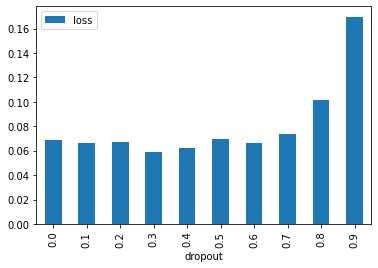

In [173]:
df.plot.bar(x='dropout', y='loss')

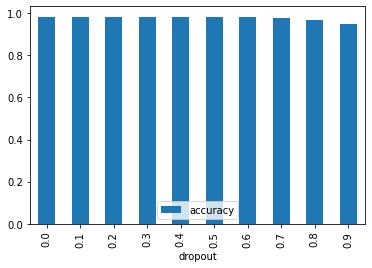

In [174]:
df.plot.bar(x='dropout', y='accuracy')

In [175]:
print(y)

{0.0: array([[1.9832740e-08, 2.5582474e-09, 1.4872123e-08, ..., 9.9999964e-01,
        9.3320085e-10, 2.1470673e-07],
       [4.7338344e-06, 9.7109694e-07, 9.9999285e-01, ..., 2.7397863e-11,
        8.9772909e-09, 4.8849796e-11],
       [3.2711760e-08, 9.9998057e-01, 2.1373805e-06, ..., 1.2945330e-05,
        2.9460289e-06, 7.4133533e-10],
       ...,
       [1.5702523e-12, 2.7317593e-11, 1.9478620e-12, ..., 9.7504078e-08,
        5.5176191e-08, 5.6910631e-06],
       [5.2647103e-10, 5.6664864e-11, 2.5033956e-11, ..., 7.8336454e-10,
        4.6965090e-07, 2.1537688e-11],
       [5.4523774e-08, 5.5920824e-10, 1.5642671e-08, ..., 2.0073552e-09,
        1.2064962e-08, 4.0332249e-09]], dtype=float32), 0.1: array([[1.38216376e-06, 2.95519467e-08, 1.18050856e-07, ...,
        9.99992371e-01, 1.30631761e-07, 3.16642445e-06],
       [3.84742149e-09, 8.08323784e-06, 9.99991775e-01, ...,
        6.82701454e-13, 2.20844228e-11, 2.86853413e-13],
       [1.45350214e-06, 9.99955535e-01, 1.42654210e-

In [176]:
model.summary()

Model: "CM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_68 (Flatten)         multiple                  0         
_________________________________________________________________
dense_204 (Dense)            multiple                  200960    
_________________________________________________________________
batch_normalization_136 (Bat multiple                  1024      
_________________________________________________________________
activation_68 (Activation)   multiple                  0         
_________________________________________________________________
dropout_68 (Dropout)         multiple                  0         
_________________________________________________________________
dense_205 (Dense)            multiple                  32896     
_________________________________________________________________
batch_normalization_137 (Bat multiple                  512      